DS514- Data Mining for Business Applications
Assignment 1

Date: 1st Mar ‘24                                                                                                Total Marks: 100

Deadline: 11th Mar ‘24, 11:55 PM

Instructions:
The assignment should be done individually.
You should submit all your work in one Jupyter Notebook. The notebook should follow naming convention:
	<entry_no.>_DS514_Lab1.ipynb
If you are using additional dataset for analysis, you should include them in a .ZIP file.
It should follow the same naming convention:
 <entry_no.>_DS514_Lab1.zip
This is a high level description of the problems. In addition to given tasks, you are free to use your own creative analysis and draw insights from the data. Kindly make sure to support your work with relevant facts.
You can find the dataset link in the description of the problem.


Q.1. Use the taxi trip dataset to find clusters of locations that might belong to a particular cluster having similar kinds of trip features. Use DBSCAN algo for this.
Show the locations belonging to each cluster over a map.
Perform the analysis of trips belonging to the same clusters and point out the distinguishing features and insights.
Also, divide a day in 1-hour slot and show a time of day based analysis of each cluster

Note: To map the ZoneId(Pickup and Dropoff) to their spatial coordinates, use the Zone Lookup table from the link below. This will be used to create visualization of clusters on the map.

Dataset link: https://drive.google.com/file/d/1L97I_30HY-Q4BKujiPWPODjkvPo2Vnlm/view?usp=drive_link

Zone Lookup table:
https://drive.google.com/file/d/1tIVIoCyGKRaVsxN_KOS3T5O-SIZPrvqp/view?usp=sharing

Refer to the document for working with PARQUET format.
You can find more information about the dataset at: https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf



In [1]:
import pandas as pd

In [2]:
df=pd.read_parquet(r"D:\Pyn\online learning\INURAN_DATA\FSDS_September\TEST_WORK\msdasm work\Data Mining\assignment\yellow_tripdata_2023-01 (2).parquet")

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [8]:
df.shape

(3066766, 19)

In [9]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

Q.2. Use the city-wise vehicle registration dataset of million+ population cities of India.
● Perform K-means and Agglomerative clustering this dataset. Discuss the insights and
distinguishing features of the cities belonging to the same cluster.
● If you need to design a marketing campaign which cities you will target for what kind of
vehicles.
● Use data.gov.in to check the other kinds of datasets available that can help you with your
analysis. Substantiate your results with proper facts and figures.
Dataset link:
https://drive.google.com/file/d/1FXOk4TAeKepHDXivUx95KDjbXQ0wx5v7/view?usp=drive_link

In [1]:
import pandas as pd

In [2]:
df2=pd.read_csv(r"D:\Pyn\online learning\INURAN_DATA\FSDS_September\TEST_WORK\msdasm work\Data Mining\assignment\RTYB201920_A3_3c_0.csv")

In [3]:
df2.head()

,States/Union Territories,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),Total Transport (I TO VII)
0,Andhra Pradesh,10332.0,211090.0,186730.0,99650.0,20890.0,7246.0,2343.0,28820.0,53568.0,26493.0,19797.0,0.0,619962.0,703.0,340010.0,1627634.0
1,Arunachal Pradesh,1544.0,6367.0,7292.0,2566.0,681.0,6677.0,1189.0,733.0,85.0,1015.0,65.0,7010.0,4272.0,0.0,0.0,39496.0
2,Assam,9225.0,147374.0,157201.0,50119.0,2105.0,17029.0,0.0,4472.0,21097.0,9647.0,47933.0,137189.0,0.0,0.0,0.0,603391.0
3,Bihar,14915.0,126414.0,87632.0,43021.0,43875.0,0.0,0.0,0.0,112726.0,0.0,0.0,399096.0,0.0,0.0,0.0,827679.0
4,Chhattisgarh,38099.0,120980.0,98473.0,20573.0,7321.0,1460.0,7640.0,3306.0,20963.0,877.0,0.0,46768.0,6072.0,0.0,0.0,372532.0


In [4]:
df2.shape

(37, 17)

In [9]:
df2.isnull().sum()

States/Union Territories                                        0
Multiaxled/Articulated Vehicles (I)                             1
Trucks and Lorries (II)                                         1
Light Motor Vehicles (Goods) (II) - Four Wheelers               1
Light Motor Vehicles (Goods) (II) - Three Wheelers              1
Buses (IV) - Stage carriages                                    1
Buses (IV) - Contract carriages                                 2
Buses (IV) - Private service vehicles                           2
Buses (IV) - Other buses                                        2
Taxis (V) - Motor cabs                                          1
Taxis (V) - Maxi cabs                                           2
Taxis (V) - Other taxis                                         2
Light Motor Vehicles (Passengers) (VI) - Three seaters          1
Light Motor Vehicles (Passengers) (VI) - Four to six seaters    1
Motor cycles on hire (VII)                                      1
Other vehi

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [14]:
df2.dtypes

States/Union Territories                                         object
Multiaxled/Articulated Vehicles (I)                             float64
Trucks and Lorries (II)                                         float64
Light Motor Vehicles (Goods) (II) - Four Wheelers               float64
Light Motor Vehicles (Goods) (II) - Three Wheelers              float64
Buses (IV) - Stage carriages                                    float64
Buses (IV) - Contract carriages                                 float64
Buses (IV) - Private service vehicles                           float64
Buses (IV) - Other buses                                        float64
Taxis (V) - Motor cabs                                          float64
Taxis (V) - Maxi cabs                                           float64
Taxis (V) - Other taxis                                         float64
Light Motor Vehicles (Passengers) (VI) - Three seaters          float64
Light Motor Vehicles (Passengers) (VI) - Four to six seaters    

In [15]:
df2

,States/Union Territories,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),Total Transport (I TO VII)
0,Andhra Pradesh,10332.0,211090.0,186730.0,99650.0,20890.0,7246.0,2343.0,28820.0,53568.0,26493.0,19797.0,0.0,619962.0,703.0,340010.0,1627634.0
1,Arunachal Pradesh,1544.0,6367.0,7292.0,2566.0,681.0,6677.0,1189.0,733.0,85.0,1015.0,65.0,7010.0,4272.0,0.0,0.0,39496.0
2,Assam,9225.0,147374.0,157201.0,50119.0,2105.0,17029.0,0.0,4472.0,21097.0,9647.0,47933.0,137189.0,0.0,0.0,0.0,603391.0
3,Bihar,14915.0,126414.0,87632.0,43021.0,43875.0,0.0,0.0,0.0,112726.0,0.0,0.0,399096.0,0.0,0.0,0.0,827679.0
4,Chhattisgarh,38099.0,120980.0,98473.0,20573.0,7321.0,1460.0,7640.0,3306.0,20963.0,877.0,0.0,46768.0,6072.0,0.0,0.0,372532.0
5,Goa,0.0,67933.0,0.0,0.0,12641.0,0.0,0.0,0.0,27076.0,0.0,0.0,4662.0,173.0,33134.0,0.0,145619.0
6,Gujarat,0.0,512530.0,356734.0,409597.0,32389.0,36753.0,8934.0,14457.0,97287.0,54376.0,0.0,906194.0,0.0,0.0,0.0,2429251.0
7,Haryana,857033.0,294031.0,183115.0,18099.0,14726.0,21893.0,13349.0,12253.0,93349.0,3081.0,0.0,251886.0,93349.0,3076.0,0.0,1859240.0
8,Himachal Pradesh,9.0,92700.0,65258.0,3410.0,6428.0,2982.0,874.0,0.0,26451.0,12485.0,0.0,55521.0,4214.0,0.0,0.0,270332.0
9,Jammu and Kashmir,498.0,70813.0,51754.0,48890.0,18630.0,6107.0,5807.0,930.0,13179.0,35132.0,11833.0,27568.0,2768.0,390.0,0.0,294299.0


In [16]:
df2.drop(32,inplace=True,axis=0)

In [17]:
df2.shape

(36, 17)

In [18]:
df2

,States/Union Territories,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),Total Transport (I TO VII)
0,Andhra Pradesh,10332.0,211090.0,186730.0,99650.0,20890.0,7246.0,2343.0,28820.0,53568.0,26493.0,19797.0,0.0,619962.0,703.0,340010.0,1627634.0
1,Arunachal Pradesh,1544.0,6367.0,7292.0,2566.0,681.0,6677.0,1189.0,733.0,85.0,1015.0,65.0,7010.0,4272.0,0.0,0.0,39496.0
2,Assam,9225.0,147374.0,157201.0,50119.0,2105.0,17029.0,0.0,4472.0,21097.0,9647.0,47933.0,137189.0,0.0,0.0,0.0,603391.0
3,Bihar,14915.0,126414.0,87632.0,43021.0,43875.0,0.0,0.0,0.0,112726.0,0.0,0.0,399096.0,0.0,0.0,0.0,827679.0
4,Chhattisgarh,38099.0,120980.0,98473.0,20573.0,7321.0,1460.0,7640.0,3306.0,20963.0,877.0,0.0,46768.0,6072.0,0.0,0.0,372532.0
5,Goa,0.0,67933.0,0.0,0.0,12641.0,0.0,0.0,0.0,27076.0,0.0,0.0,4662.0,173.0,33134.0,0.0,145619.0
6,Gujarat,0.0,512530.0,356734.0,409597.0,32389.0,36753.0,8934.0,14457.0,97287.0,54376.0,0.0,906194.0,0.0,0.0,0.0,2429251.0
7,Haryana,857033.0,294031.0,183115.0,18099.0,14726.0,21893.0,13349.0,12253.0,93349.0,3081.0,0.0,251886.0,93349.0,3076.0,0.0,1859240.0
8,Himachal Pradesh,9.0,92700.0,65258.0,3410.0,6428.0,2982.0,874.0,0.0,26451.0,12485.0,0.0,55521.0,4214.0,0.0,0.0,270332.0
9,Jammu and Kashmir,498.0,70813.0,51754.0,48890.0,18630.0,6107.0,5807.0,930.0,13179.0,35132.0,11833.0,27568.0,2768.0,390.0,0.0,294299.0


In [19]:
df2.columns

Index(['States/Union Territories', 'Multiaxled/Articulated Vehicles (I)',
       'Trucks and Lorries (II)',
       'Light Motor Vehicles (Goods) (II) - Four Wheelers',
       'Light Motor Vehicles (Goods) (II) - Three Wheelers',
       'Buses (IV) - Stage carriages', 'Buses (IV) - Contract carriages',
       'Buses (IV) - Private service vehicles', 'Buses (IV) - Other buses',
       'Taxis (V) - Motor cabs', 'Taxis (V) - Maxi cabs',
       'Taxis (V) - Other taxis',
       'Light Motor Vehicles (Passengers) (VI) - Three seaters',
       'Light Motor Vehicles (Passengers) (VI) - Four to six seaters',
       'Motor cycles on hire (VII)', 'Other vehicles not included in (I-VII)',
       'Total Transport (I TO VII)'],
      dtype='object')

In [20]:
df2[df2.columns[(df2.isnull().sum()>0)==True]]

,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis
0,7246.0,2343.0,28820.0,26493.0,19797.0
1,6677.0,1189.0,733.0,1015.0,65.0
2,17029.0,0.0,4472.0,9647.0,47933.0
3,0.0,0.0,0.0,0.0,0.0
4,1460.0,7640.0,3306.0,877.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,36753.0,8934.0,14457.0,54376.0,0.0
7,21893.0,13349.0,12253.0,3081.0,0.0
8,2982.0,874.0,0.0,12485.0,0.0
9,6107.0,5807.0,930.0,35132.0,11833.0


In [21]:
df2.columns

Index(['States/Union Territories', 'Multiaxled/Articulated Vehicles (I)',
       'Trucks and Lorries (II)',
       'Light Motor Vehicles (Goods) (II) - Four Wheelers',
       'Light Motor Vehicles (Goods) (II) - Three Wheelers',
       'Buses (IV) - Stage carriages', 'Buses (IV) - Contract carriages',
       'Buses (IV) - Private service vehicles', 'Buses (IV) - Other buses',
       'Taxis (V) - Motor cabs', 'Taxis (V) - Maxi cabs',
       'Taxis (V) - Other taxis',
       'Light Motor Vehicles (Passengers) (VI) - Three seaters',
       'Light Motor Vehicles (Passengers) (VI) - Four to six seaters',
       'Motor cycles on hire (VII)', 'Other vehicles not included in (I-VII)',
       'Total Transport (I TO VII)'],
      dtype='object')

In [22]:
df2[df2.columns[(df2.isnull().sum()>0)==True]]

,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis
0,7246.0,2343.0,28820.0,26493.0,19797.0
1,6677.0,1189.0,733.0,1015.0,65.0
2,17029.0,0.0,4472.0,9647.0,47933.0
3,0.0,0.0,0.0,0.0,0.0
4,1460.0,7640.0,3306.0,877.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,36753.0,8934.0,14457.0,54376.0,0.0
7,21893.0,13349.0,12253.0,3081.0,0.0
8,2982.0,874.0,0.0,12485.0,0.0
9,6107.0,5807.0,930.0,35132.0,11833.0


In [23]:
df2.isnull().sum()

States/Union Territories                                        0
Multiaxled/Articulated Vehicles (I)                             0
Trucks and Lorries (II)                                         0
Light Motor Vehicles (Goods) (II) - Four Wheelers               0
Light Motor Vehicles (Goods) (II) - Three Wheelers              0
Buses (IV) - Stage carriages                                    0
Buses (IV) - Contract carriages                                 1
Buses (IV) - Private service vehicles                           1
Buses (IV) - Other buses                                        1
Taxis (V) - Motor cabs                                          0
Taxis (V) - Maxi cabs                                           1
Taxis (V) - Other taxis                                         1
Light Motor Vehicles (Passengers) (VI) - Three seaters          0
Light Motor Vehicles (Passengers) (VI) - Four to six seaters    0
Motor cycles on hire (VII)                                      0
Other vehi

In [24]:
df2=df2.fillna(0)

In [25]:
df2.isnull().sum()

States/Union Territories                                        0
Multiaxled/Articulated Vehicles (I)                             0
Trucks and Lorries (II)                                         0
Light Motor Vehicles (Goods) (II) - Four Wheelers               0
Light Motor Vehicles (Goods) (II) - Three Wheelers              0
Buses (IV) - Stage carriages                                    0
Buses (IV) - Contract carriages                                 0
Buses (IV) - Private service vehicles                           0
Buses (IV) - Other buses                                        0
Taxis (V) - Motor cabs                                          0
Taxis (V) - Maxi cabs                                           0
Taxis (V) - Other taxis                                         0
Light Motor Vehicles (Passengers) (VI) - Three seaters          0
Light Motor Vehicles (Passengers) (VI) - Four to six seaters    0
Motor cycles on hire (VII)                                      0
Other vehi

In [27]:
df2.iloc[:,1:]=df2.iloc[:,1:].astype("int")

In [28]:
df2

,States/Union Territories,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),Total Transport (I TO VII)
0,Andhra Pradesh,10332.0,211090.0,186730.0,99650.0,20890.0,7246.0,2343.0,28820.0,53568.0,26493.0,19797.0,0.0,619962.0,703.0,340010.0,1627634.0
1,Arunachal Pradesh,1544.0,6367.0,7292.0,2566.0,681.0,6677.0,1189.0,733.0,85.0,1015.0,65.0,7010.0,4272.0,0.0,0.0,39496.0
2,Assam,9225.0,147374.0,157201.0,50119.0,2105.0,17029.0,0.0,4472.0,21097.0,9647.0,47933.0,137189.0,0.0,0.0,0.0,603391.0
3,Bihar,14915.0,126414.0,87632.0,43021.0,43875.0,0.0,0.0,0.0,112726.0,0.0,0.0,399096.0,0.0,0.0,0.0,827679.0
4,Chhattisgarh,38099.0,120980.0,98473.0,20573.0,7321.0,1460.0,7640.0,3306.0,20963.0,877.0,0.0,46768.0,6072.0,0.0,0.0,372532.0
5,Goa,0.0,67933.0,0.0,0.0,12641.0,0.0,0.0,0.0,27076.0,0.0,0.0,4662.0,173.0,33134.0,0.0,145619.0
6,Gujarat,0.0,512530.0,356734.0,409597.0,32389.0,36753.0,8934.0,14457.0,97287.0,54376.0,0.0,906194.0,0.0,0.0,0.0,2429251.0
7,Haryana,857033.0,294031.0,183115.0,18099.0,14726.0,21893.0,13349.0,12253.0,93349.0,3081.0,0.0,251886.0,93349.0,3076.0,0.0,1859240.0
8,Himachal Pradesh,9.0,92700.0,65258.0,3410.0,6428.0,2982.0,874.0,0.0,26451.0,12485.0,0.0,55521.0,4214.0,0.0,0.0,270332.0
9,Jammu and Kashmir,498.0,70813.0,51754.0,48890.0,18630.0,6107.0,5807.0,930.0,13179.0,35132.0,11833.0,27568.0,2768.0,390.0,0.0,294299.0


In [45]:
df2.groupby(["States/Union Territories"])["Multiaxled/Articulated Vehicles (I)"].sum()

States/Union Territories
Andaman and Nicobar Islands          0.0
Andhra Pradesh                   10332.0
Arunachal Pradesh                 1544.0
Assam                             9225.0
Bihar                            14915.0
Chandigarh                           0.0
Chhattisgarh                     38099.0
Daman and Diu                     1477.0
Delhi                                0.0
Goa                                  0.0
Gujarat                              0.0
Haryana                         857033.0
Himachal Pradesh                     9.0
Jammu and Kashmir                  498.0
Jharkhand                           71.0
Karnataka                        19456.0
Kerala                           68871.0
Lakshadweep                          0.0
Madhya Pradesh                   69708.0
Maharashtra                      63880.0
Manipur                           1651.0
Meghalaya                            0.0
Mizoram                              2.0
Nagaland                        

In [46]:
df2.shape

(36, 17)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(df2.iloc[:,1:])

In [21]:
scaled_Univ_df

array([[-2.70488473e-01, -1.18776990e-01, -9.61908114e-02,
        -5.27283047e-02, -2.05931377e-01, -2.02983157e-01,
        -2.23204365e-01,  3.04163804e-01, -2.01840003e-01,
        -1.60064744e-01,  4.02233693e-01, -3.36297426e-01,
         1.29098561e+00, -2.23788533e-01,  3.50857907e+00,
         1.37542305e-02],
       [-3.00065700e-01, -3.34725213e-01, -3.28702690e-01,
        -3.25225659e-01, -3.29211219e-01, -2.12945365e-01,
        -2.73831151e-01, -3.06381042e-01, -3.40655482e-01,
        -3.19644073e-01, -3.18212473e-01, -3.29234269e-01,
        -3.05070663e-01, -2.91668587e-01, -2.68432063e-01,
        -3.32820692e-01],
       [-2.74214235e-01, -1.85986620e-01, -1.34453851e-01,
        -1.91752927e-01, -3.20524470e-01, -3.16997042e-02,
        -3.25993412e-01, -2.25104040e-01, -2.86118697e-01,
        -2.65578260e-01,  1.42952304e+00, -1.98068132e-01,
        -3.16144990e-01, -2.91668587e-01, -2.68432063e-01,
        -2.09763460e-01],
       [-2.55063754e-01, -2.08095883e

In [22]:
from sklearn.cluster import KMeans

In [23]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

In [24]:
wcss

[576.0,
 77.58521418296215,
 67.65413909011494,
 51.26687269509535,
 36.78943942714605,
 29.600221063789764,
 24.922931276968423,
 17.308223531952088,
 12.836606874916974,
 10.429624263732972]

In [25]:
from matplotlib import pyplot as plt

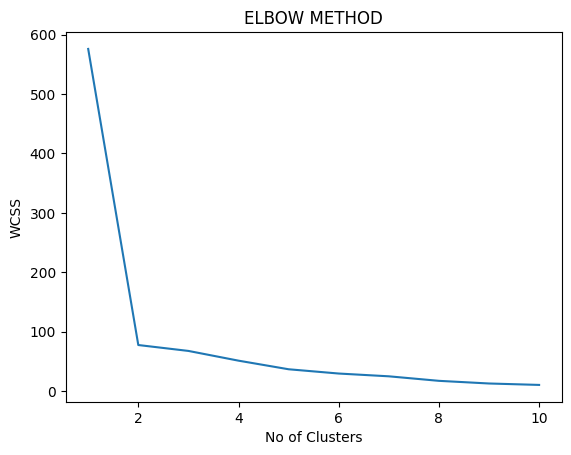

In [26]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=4, random_state=12)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=4, random_state=12)

In [28]:
clusters_new.labels_

array([3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1])

In [29]:
#Assign clusters to the data set
df2['clusterid_new'] = clusters_new.labels_

In [30]:
df2

,States/Union Territories,Multiaxled/Articulated Vehicles (I),Trucks and Lorries (II),Light Motor Vehicles (Goods) (II) - Four Wheelers,Light Motor Vehicles (Goods) (II) - Three Wheelers,Buses (IV) - Stage carriages,Buses (IV) - Contract carriages,Buses (IV) - Private service vehicles,Buses (IV) - Other buses,Taxis (V) - Motor cabs,Taxis (V) - Maxi cabs,Taxis (V) - Other taxis,Light Motor Vehicles (Passengers) (VI) - Three seaters,Light Motor Vehicles (Passengers) (VI) - Four to six seaters,Motor cycles on hire (VII),Other vehicles not included in (I-VII),Total Transport (I TO VII),clusterid_new
0,Andhra Pradesh,10332.0,211090.0,186730.0,99650.0,20890.0,7246.0,2343.0,28820.0,53568.0,26493.0,19797.0,0.0,619962.0,703.0,340010.0,1627634.0,3
1,Arunachal Pradesh,1544.0,6367.0,7292.0,2566.0,681.0,6677.0,1189.0,733.0,85.0,1015.0,65.0,7010.0,4272.0,0.0,0.0,39496.0,2
2,Assam,9225.0,147374.0,157201.0,50119.0,2105.0,17029.0,0.0,4472.0,21097.0,9647.0,47933.0,137189.0,0.0,0.0,0.0,603391.0,2
3,Bihar,14915.0,126414.0,87632.0,43021.0,43875.0,0.0,0.0,0.0,112726.0,0.0,0.0,399096.0,0.0,0.0,0.0,827679.0,2
4,Chhattisgarh,38099.0,120980.0,98473.0,20573.0,7321.0,1460.0,7640.0,3306.0,20963.0,877.0,0.0,46768.0,6072.0,0.0,0.0,372532.0,2
5,Goa,0.0,67933.0,0.0,0.0,12641.0,0.0,0.0,0.0,27076.0,0.0,0.0,4662.0,173.0,33134.0,0.0,145619.0,0
6,Gujarat,0.0,512530.0,356734.0,409597.0,32389.0,36753.0,8934.0,14457.0,97287.0,54376.0,0.0,906194.0,0.0,0.0,0.0,2429251.0,2
7,Haryana,857033.0,294031.0,183115.0,18099.0,14726.0,21893.0,13349.0,12253.0,93349.0,3081.0,0.0,251886.0,93349.0,3076.0,0.0,1859240.0,2
8,Himachal Pradesh,9.0,92700.0,65258.0,3410.0,6428.0,2982.0,874.0,0.0,26451.0,12485.0,0.0,55521.0,4214.0,0.0,0.0,270332.0,2
9,Jammu and Kashmir,498.0,70813.0,51754.0,48890.0,18630.0,6107.0,5807.0,930.0,13179.0,35132.0,11833.0,27568.0,2768.0,390.0,0.0,294299.0,2


TypeError: Could not convert Goa to numeric

In [ ]:
df2

Q.3. Use Spotify dataset for Association rule mining.
● Identify user playlist patterns based on features like Artist name, Playlist name etc.
● Find association rules based on frequently played artists/playlists. Determine which of
them classify as strong.
Dataset link:
https://drive.google.com/file/d/1Lj3xGBwmzqbUhLVdfcqHftl3sPk4_NI-/view?usp=sharing
[20 Marks]